**Data Reading and Cleaning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = "solarpowergeneration.csv"  
df = pd.read_csv(file_path)
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [3]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [4]:
# Display basic dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
df.shape

(2920, 10)

## Finding null values

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


## Filling null values with median

In [8]:
df["average-wind-speed-(period)"].fillna(df["average-wind-speed-(period)"].median(), inplace=True) # filling null; value


In [9]:
print(df.isnull().sum())

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


## EDA 

In [10]:
# Set style for plots
sns.set(style="whitegrid")

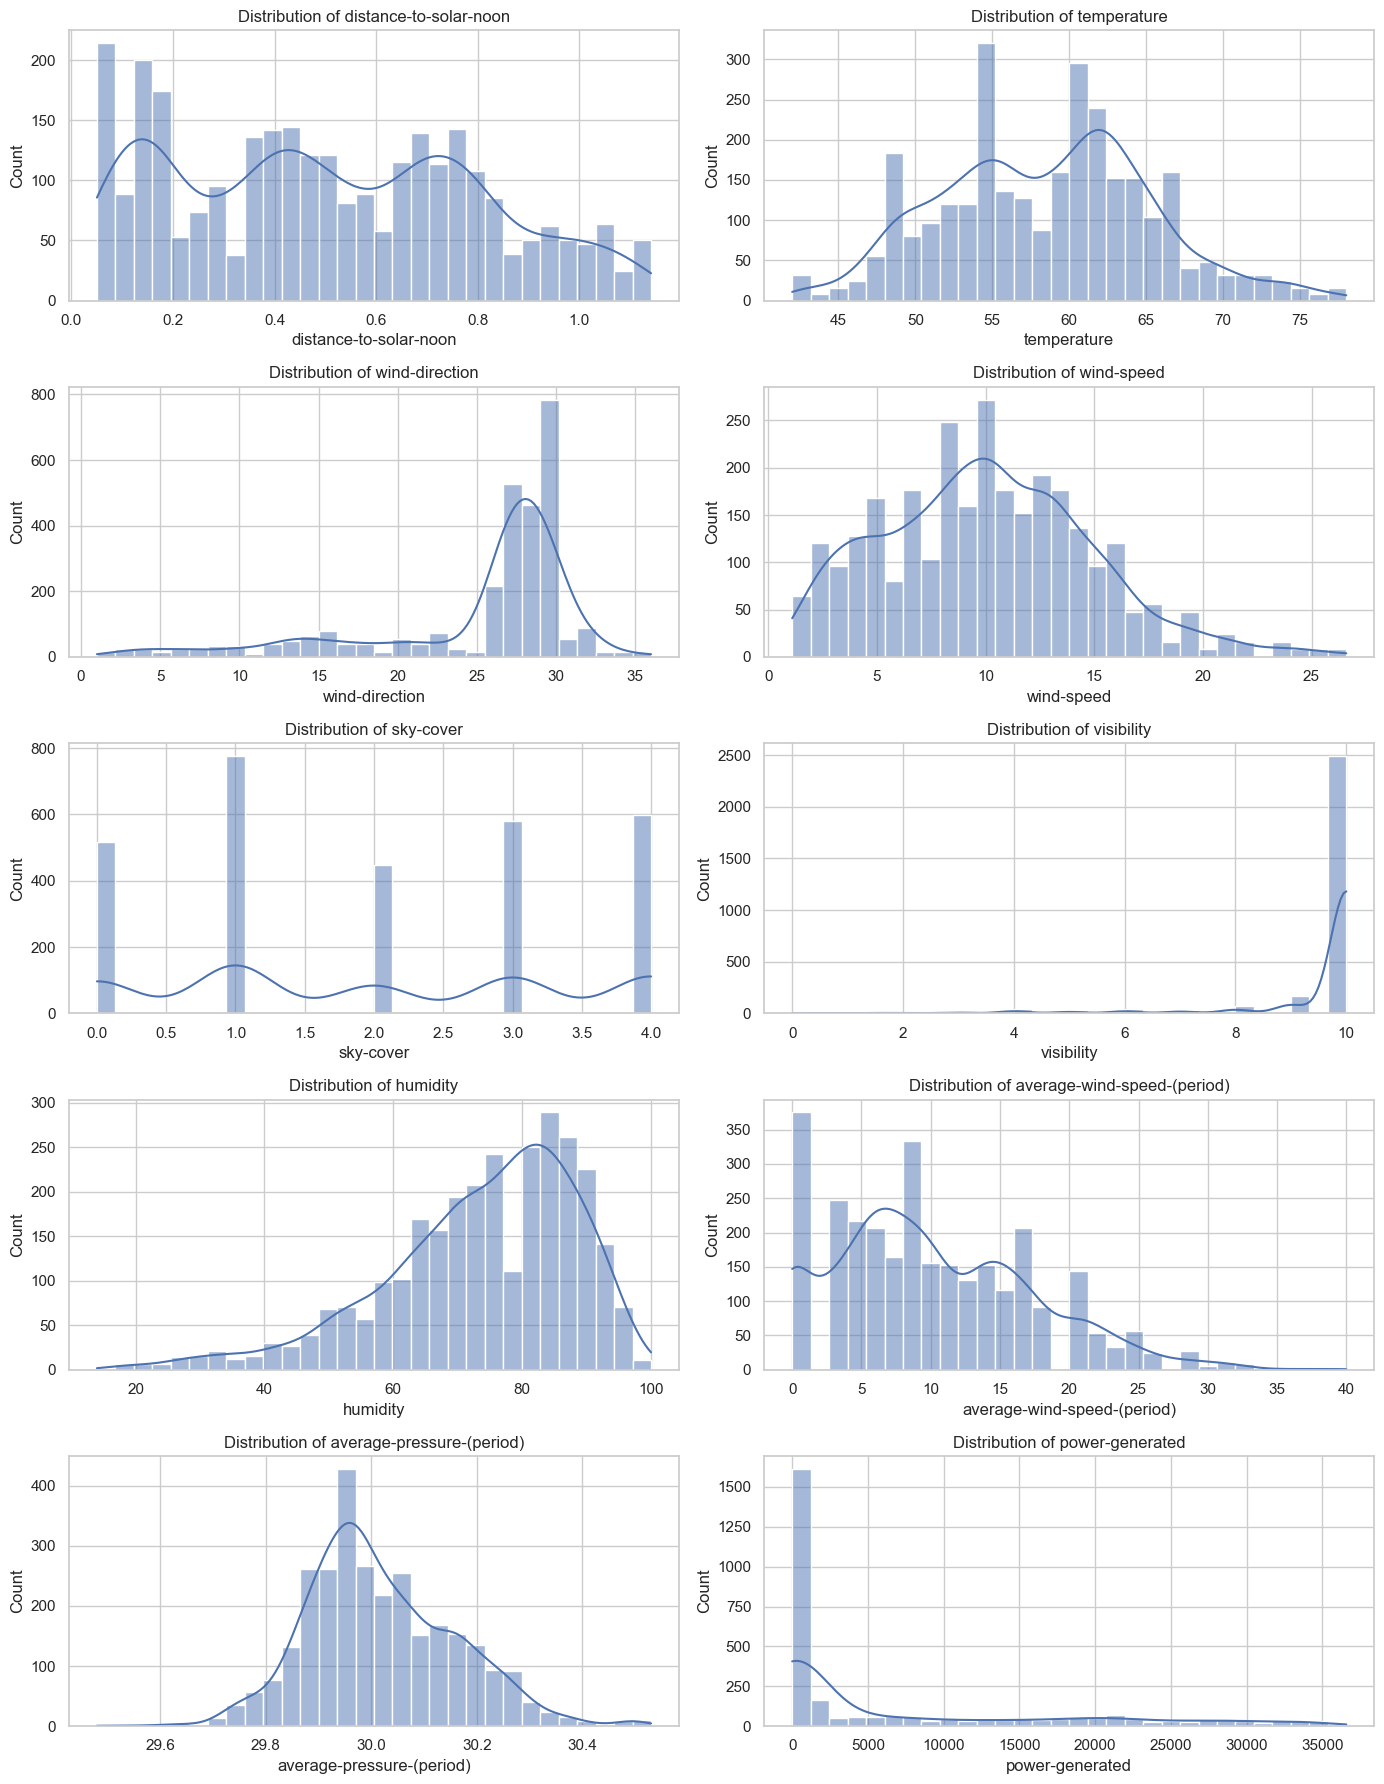

In [11]:
# Plot distributions of numerical features
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.flatten()
columns = df.columns

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [12]:
# Compute correlation matrix
correlation_matrix = df.corr()

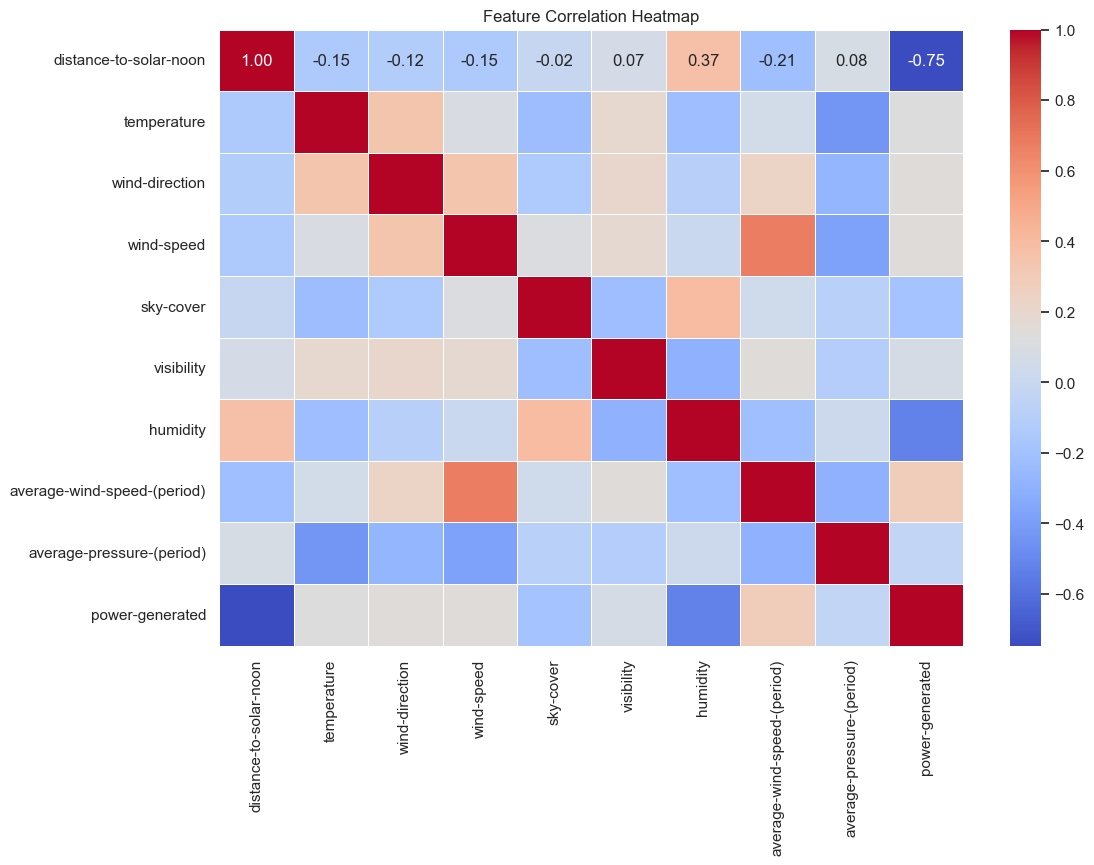

In [13]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

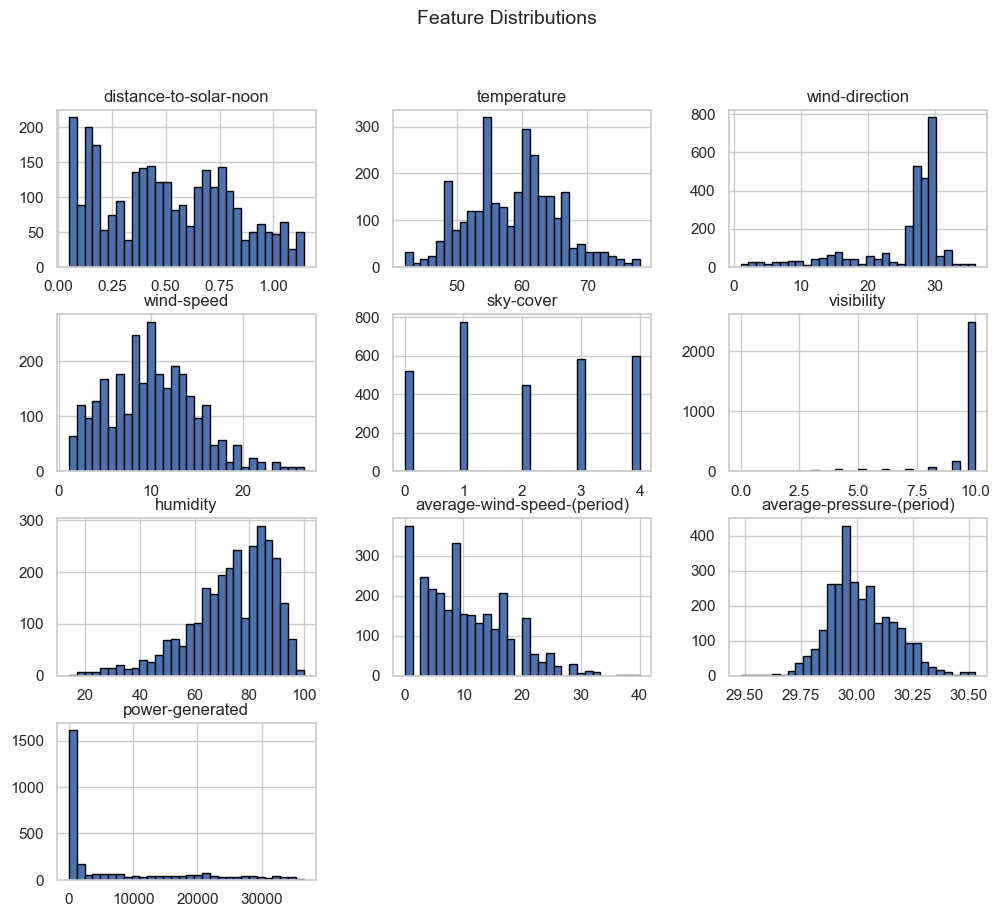

In [14]:
# histograms
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

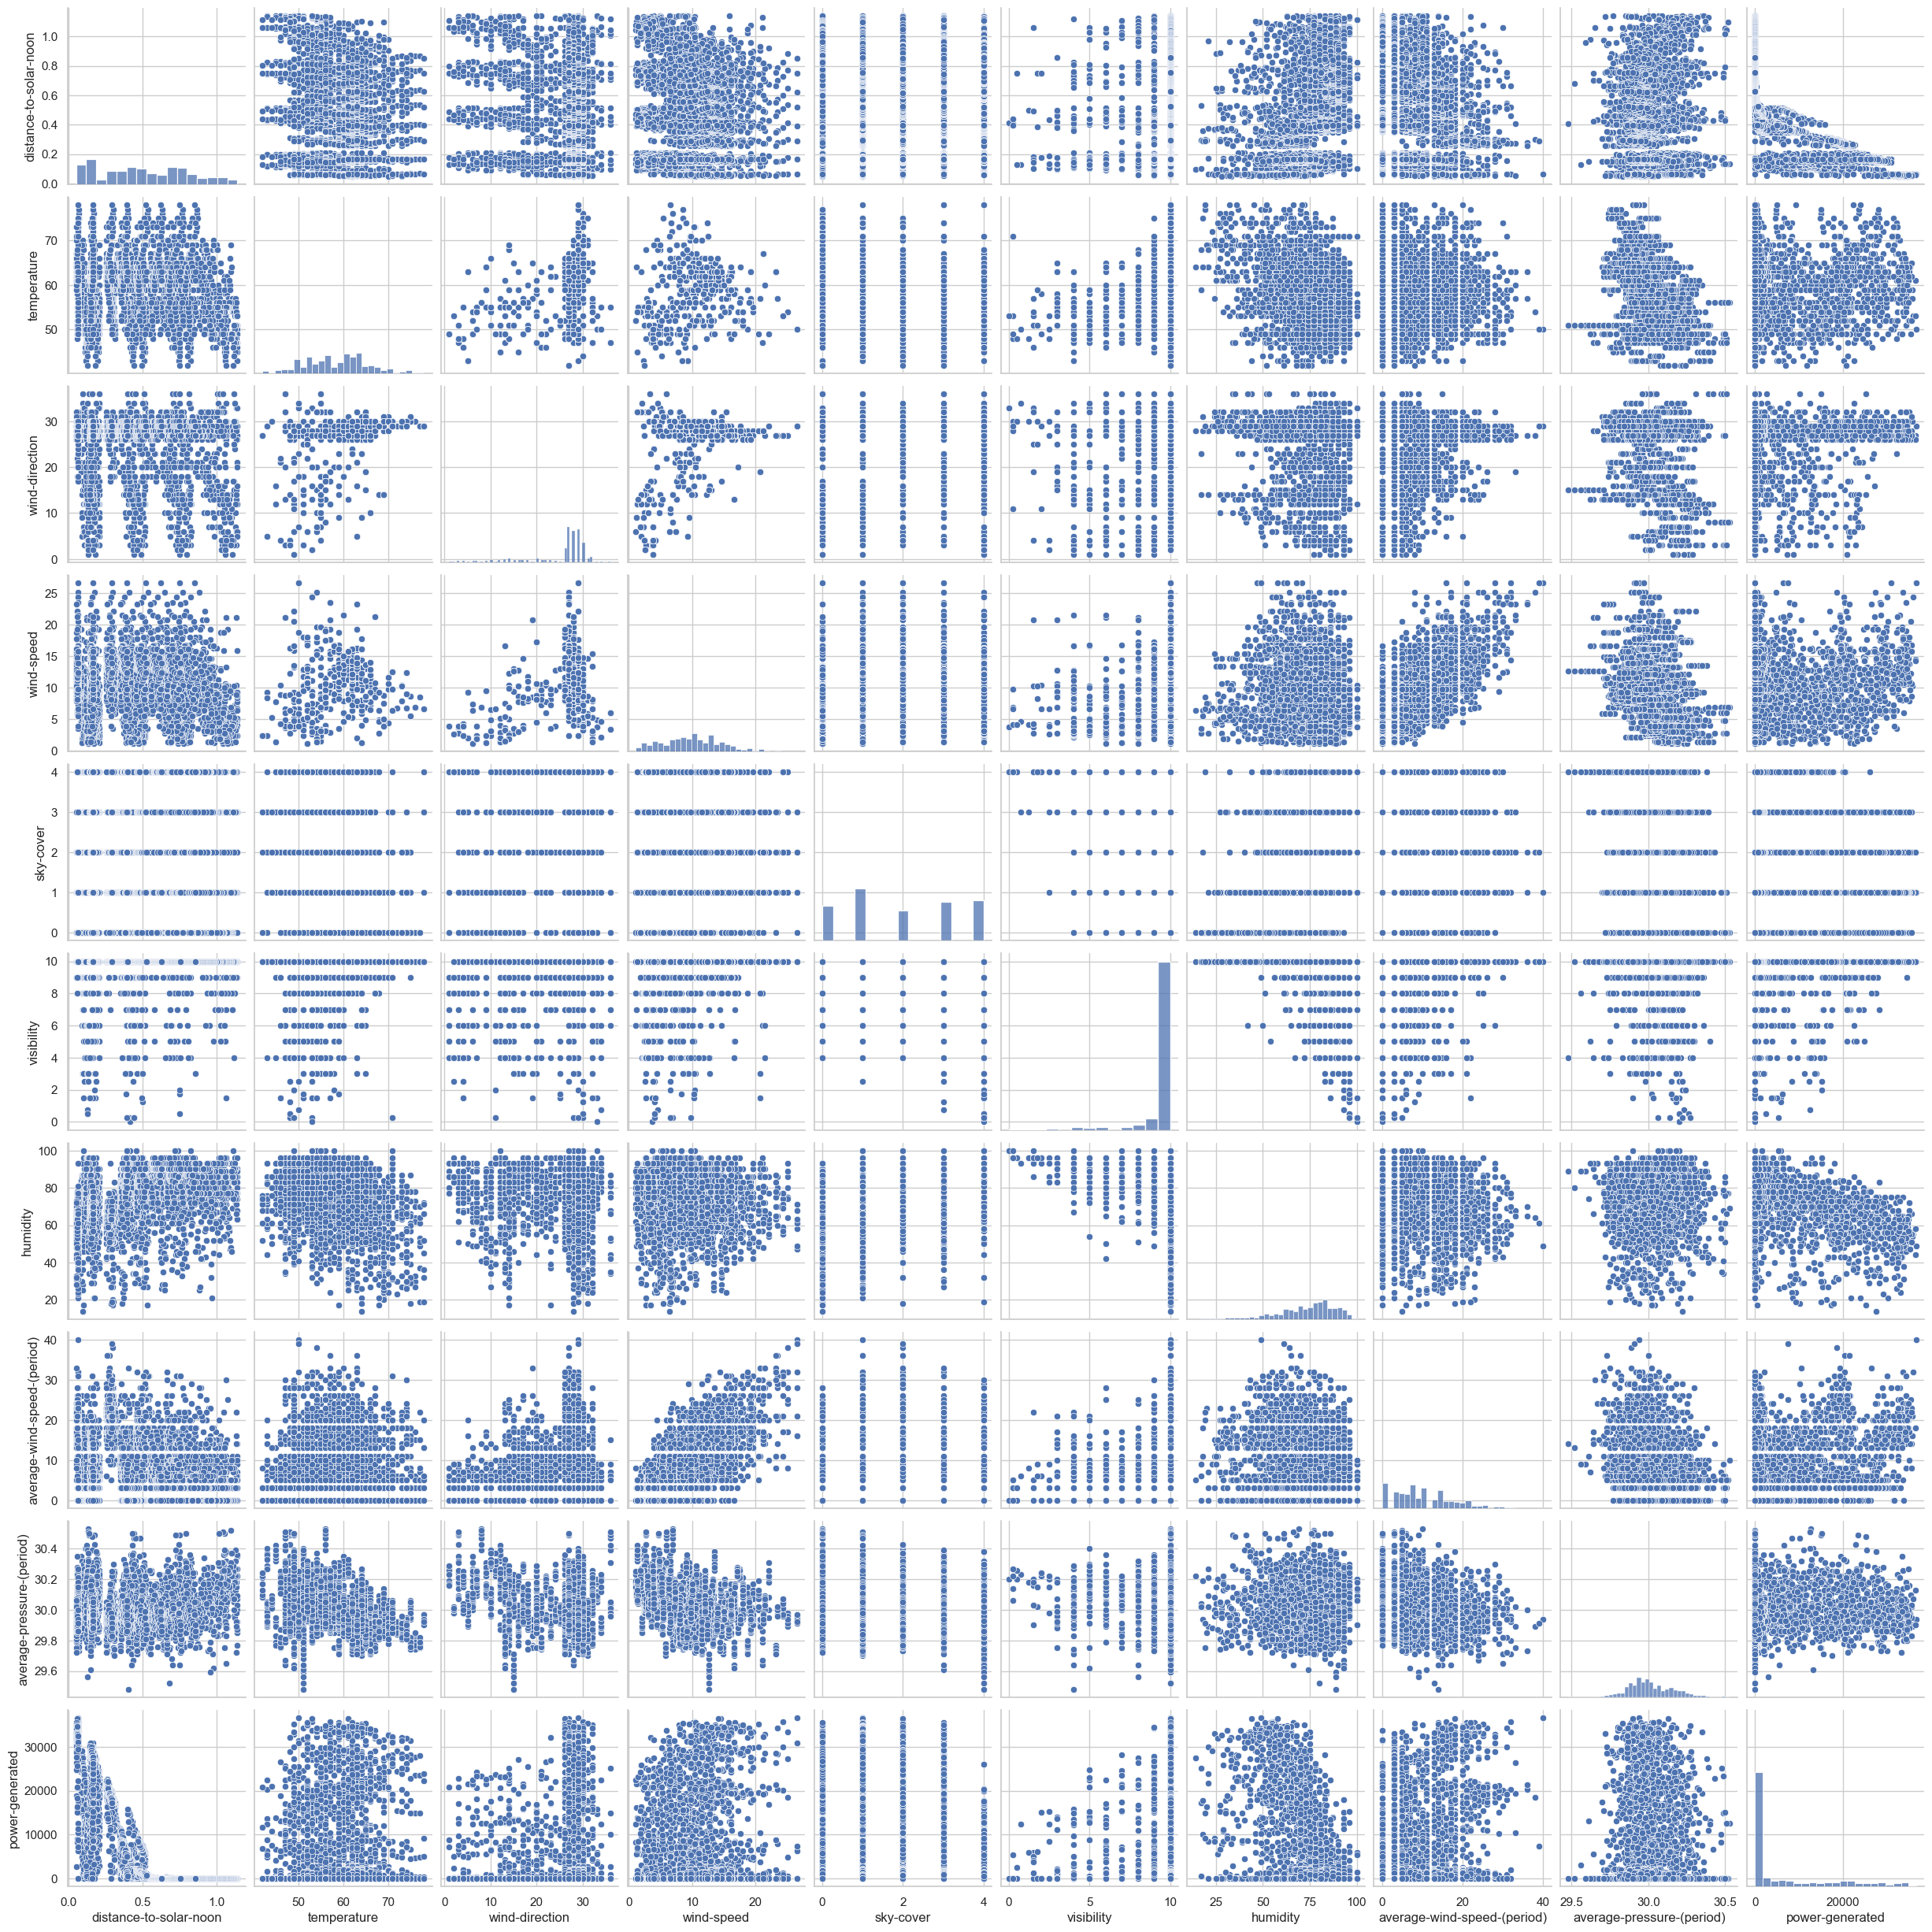

In [15]:
sns.pairplot(df)
plt.show()

## feature Engineering / Model Building part

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
# Define features and target variable
X = df.drop(columns=["power-generated"])  # All columns except target
y = df["power-generated"]  # Target variable


In [18]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (needed for Linear Regression, but not for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


In [20]:
# Train and evaluate models
results = {}

for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # Tree-based models don't need scaling
        y_pred = model.predict(X_test)

In [25]:
# Calculate evaluation metrics
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Store results
results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# Print results
print(f" Model: {name}")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R² Score: {r2:.2f}")
print("-" * 40)


 Model: XGBoost
  MAE: 1588.27
  RMSE: 3259.96
  R² Score: 0.90
----------------------------------------


## Hyperparameter Tuning using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest and XGBoost
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 6, 10]
}

# Initialize GridSearchCV for each model
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the models
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", -grid_search_rf.best_score_)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", -grid_search_xgb.best_score_)


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest: 9560789.169849206
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score for XGBoost: 9497972.90476846


In [27]:
# Evaluate Random Forest with the best parameters
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate XGBoost with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display results
print("Random Forest Performance:")
print(f"  MAE: {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R² Score: {r2_rf:.2f}")

print("-" * 40)

print("XGBoost Performance:")
print(f"  MAE: {mae_xgb:.2f}")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  R² Score: {r2_xgb:.2f}")


Random Forest Performance:
  MAE: 1561.08
  RMSE: 3420.62
  R² Score: 0.89
----------------------------------------
XGBoost Performance:
  MAE: 1708.06
  RMSE: 3288.75
  R² Score: 0.90


### Feature Importance Visualizatio

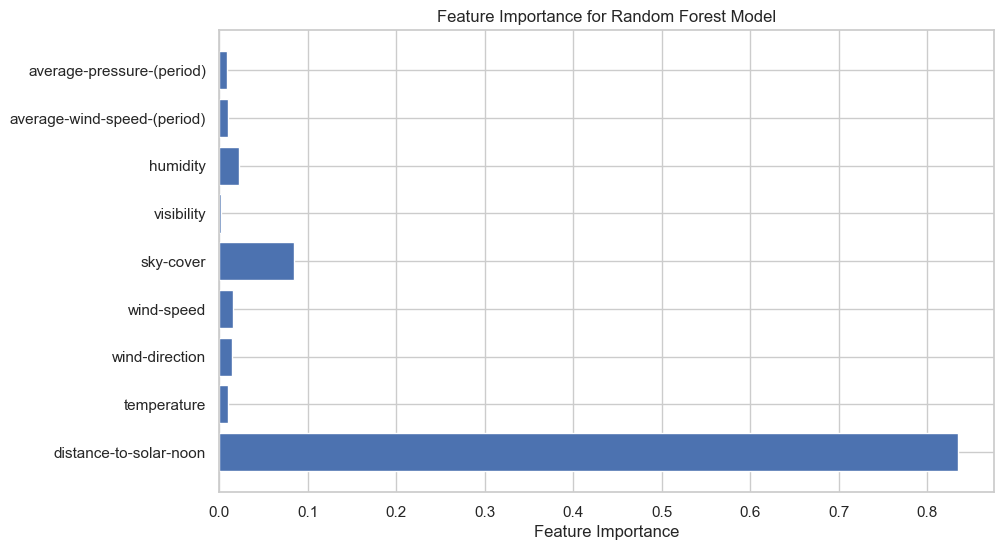

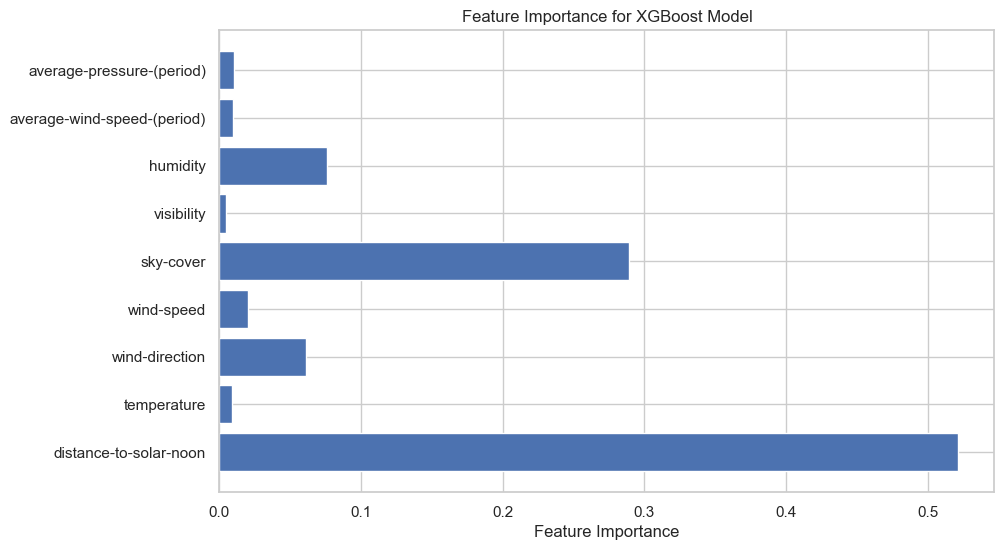

In [28]:
# Feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_rf_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest Model")
plt.show()

# Feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_xgb_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for XGBoost Model")
plt.show()


### saving the best model

In [29]:
import joblib

# Save the best model (e.g., XGBoost)
joblib.dump(best_xgb_model, 'solar_power_model_xgb_best.pkl')

['solar_power_model_xgb_best.pkl']

In [31]:
# Load the model later for predictions
loaded_model_xgb = joblib.load('solar_power_model_xgb_best.pkl')
